In [1]:
import pandas as pd
from matplotlib import pyplot as plt

<br>
<br>
<br>

### Data Collection

In [2]:
# loading training data
train_data = pd.read_csv("../data/train_data.csv")
train_data.head(3)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# inspecting shape of data
train_data.shape

(297960, 785)

<br>
<br>
<br>

### Data Preparation

In [4]:
# seperating features
X = train_data.drop(['0'], axis=1)
print(X.shape)
X.head(3)

(297960, 784)


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# seperating target
y = train_data[['0']]
y.head(3)

,0
0,4
1,13
2,15


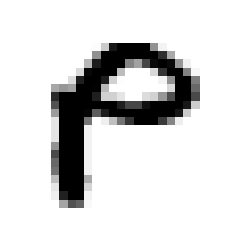

In [6]:
# random letter visualization
plt.figure(figsize=(3, 3))
plt.imshow(X.iloc[2].values.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

<br>
<br>
<br>

### Data Preprocessing

In [7]:
from sklearn.preprocessing import OneHotEncoder

<br>

#### Features

In [8]:
# random subset (without normalization)
X.iloc[:5, 312:320]

,0.275,0.276,0.277,0.278,0.279,0.280,43.1,235.1
0,255,255,255,190,248,255,255,255
1,0,210,255,255,255,255,236,13
2,0,172,255,255,255,255,255,255
3,0,0,0,0,113,198,255,255
4,214,230,243,240,206,104,169,226


In [9]:
# normalizing data
x_scaled = X / 255

In [10]:
# same subset (with normalization)
x_scaled.iloc[:5, 312:320]

,0.275,0.276,0.277,0.278,0.279,0.280,43.1,235.1
0,1.000000,1.000000,1.000000,0.745098,0.972549,1.000000,1.000000,1.000000
1,0.000000,0.823529,1.000000,1.000000,1.000000,1.000000,0.925490,0.050980
2,0.000000,0.674510,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.000000,0.000000,0.000000,0.000000,0.443137,0.776471,1.000000,1.000000
4,0.839216,0.901961,0.952941,0.941176,0.807843,0.407843,0.662745,0.886275


<br>

#### Target

In [11]:
# one hot encoder
encoder = OneHotEncoder()

In [12]:
# encoding target
y_encoded = encoder.fit_transform(y)
y_encoded

<297960x26 sparse matrix of type '<class 'numpy.float64'>'
	with 297960 stored elements in Compressed Sparse Row format>

<br>
<br>
<br>

### Modelling

In [13]:
from tensorflow import keras

In [14]:
# number of output classes
num_classes = 26
# input data shape
input_shape = (784, )

In [21]:
# sequential model
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax'),
    ]
)

# get model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 26)                2626      
                                                                 
Total params: 268,226
Trainable params: 268,226
Non-trainable params: 0
_________________________________________________________________


In [22]:
# batch size
batch_size = 50
# no of iterations
epochs = 4

# compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [23]:
# training the model and saving history
history = model.fit(
    x_scaled,
    y_encoded.toarray(),
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1
)

Epoch 1/4
5364/5364 [==============================] - 28s 5ms/step - loss: 0.2316 - accuracy: 0.9351 - val_loss: 0.1190 - val_accuracy: 0.9663
Epoch 2/4
5364/5364 [==============================] - 25s 5ms/step - loss: 0.0982 - accuracy: 0.9713 - val_loss: 0.0886 - val_accuracy: 0.9748
Epoch 3/4
5364/5364 [==============================] - 23s 4ms/step - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.0807 - val_accuracy: 0.9774
Epoch 4/4
5364/5364 [==============================] - 22s 4ms/step - loss: 0.0555 - accuracy: 0.9829 - val_loss: 0.0704 - val_accuracy: 0.9818


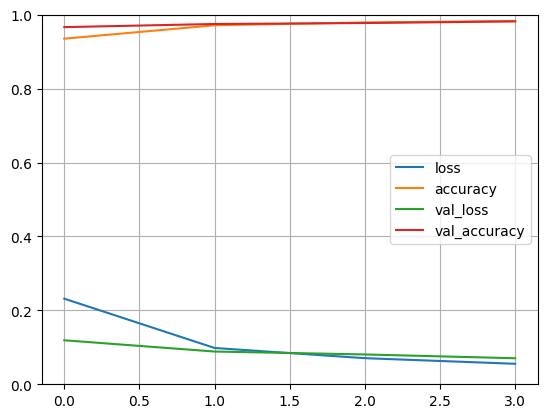

In [24]:
# model training data

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<br>
<br>
<br>

### Test Data

#### Accuracy on test data

In [49]:
# loading test data
test_data = pd.read_csv("../data/test_data.csv")
test_data.head(3)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# seperating features and target
x_test = test_data.drop(['0'], axis=1)
y_test = test_data[['0']]

In [51]:
# normalizing features
x_test_scaled = x_test / 255

# encoding target
y_test_encoded = encoder.transform(y_test)

In [52]:
# model evaluation on test data
model.evaluate(x_test_scaled, y_test_encoded.toarray())

2328/2328 [==============================] - 5s 2ms/step - loss: 0.0683 - accuracy: 0.9807


[0.06825780868530273, 0.9806819558143616]

<br>
<br>

#### Performance on random data

In [39]:
# selecting random sample of data
random_samples = x_test_scaled[50_001: 50_004]
random_samples.shape

(3, 784)

In [40]:
# making prediction on this sample
predictions = model.predict(random_samples).round(2)
predictions

1/1 [==============================] - 0s 27ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [41]:
# getting prediction classes
classes = predictions.argmax(axis=1)
classes

array([10, 13, 23], dtype=int64)

In [42]:
# getting letter from classes
class_names = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

print(class_names[classes[0]])
print(class_names[classes[1]])
print(class_names[classes[2]])

K
N
X


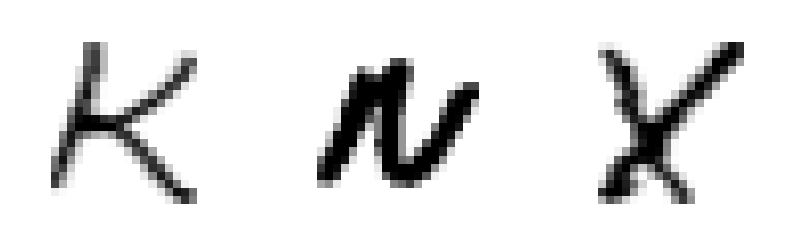

In [43]:
# plotting actual letters
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(random_samples.values[0].reshape(28,28), cmap='binary')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(random_samples.values[1].reshape(28,28), cmap='binary')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(random_samples.values[2].reshape(28,28), cmap='binary')
plt.axis('off')

plt.show()

<br>
<br>
<br>

### Saving Model

In [46]:
import joblib

In [47]:
# saving neural nets model
model.save("../models/sequential_300_100.h5")

In [48]:
# saving one hot encoder
joblib.dump(encoder, "../models/one_hot_encoder.pkl")

['../models/one_hot_encoder.pkl']